<a href="https://colab.research.google.com/github/NehaTiru/Image_Processing/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving Activity_1.jpg to Activity_1.jpg


In [ ]:
from IPython.display import Image

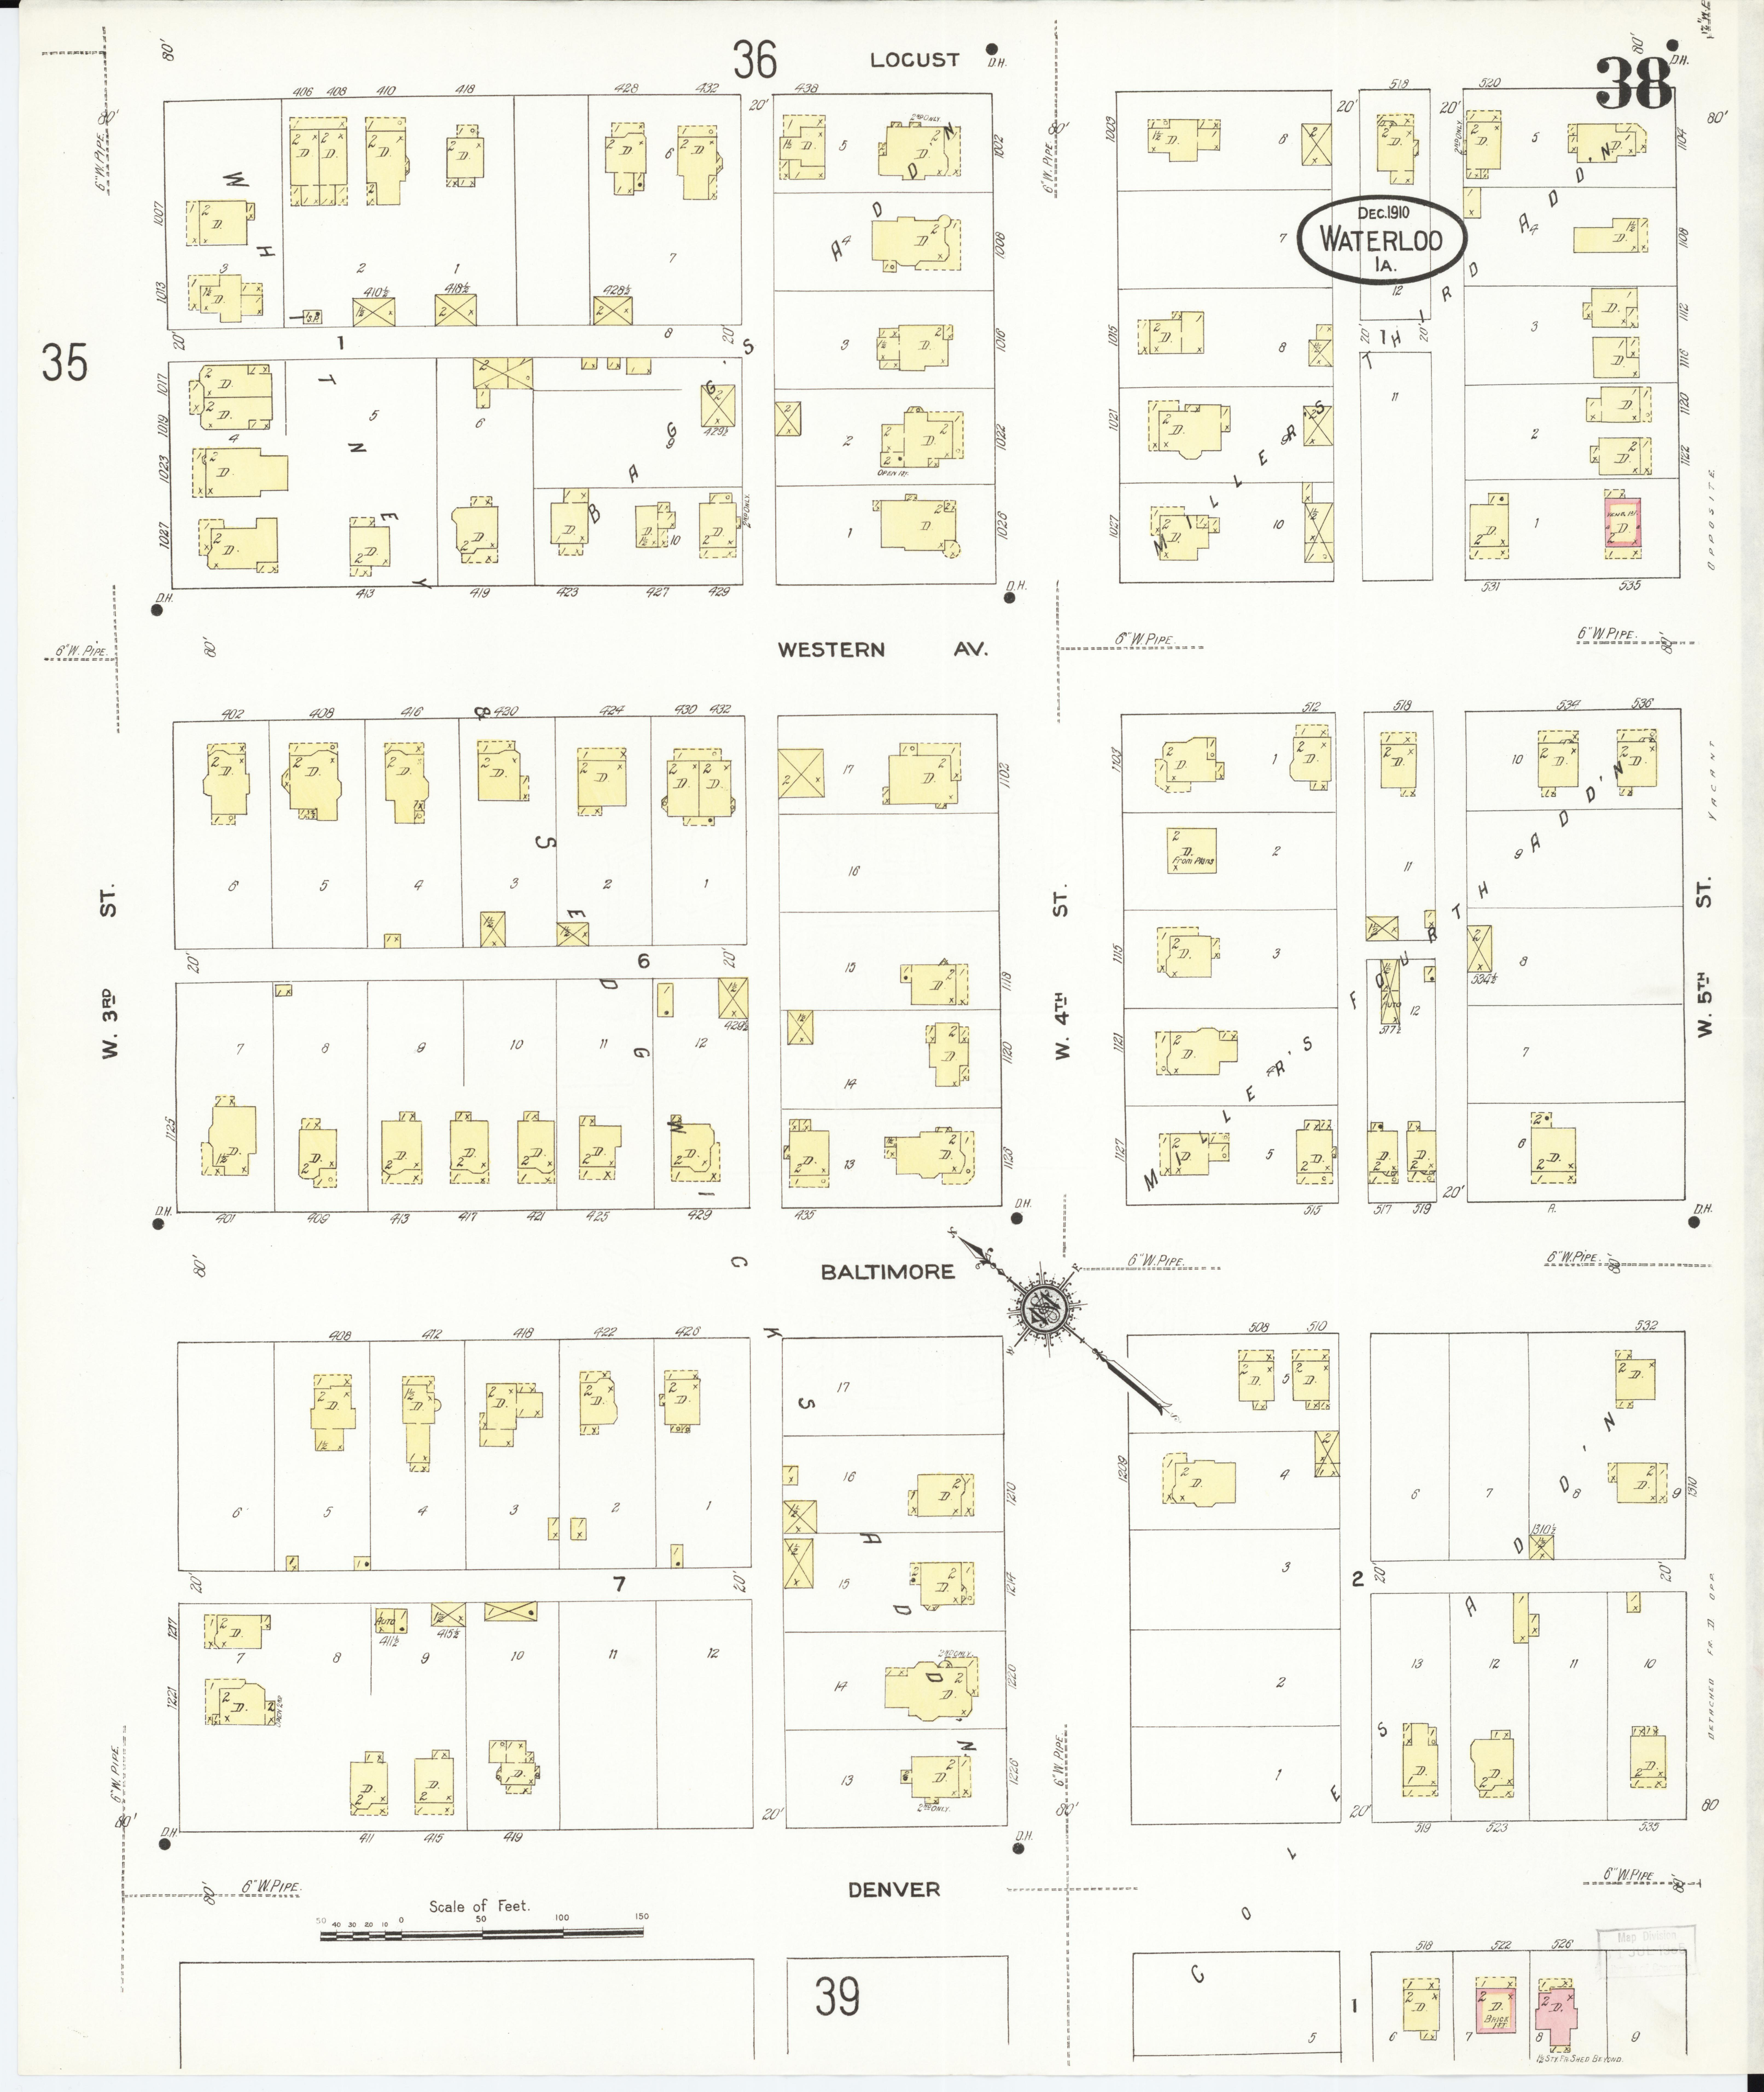

In [ ]:
Image('Activity_1.jpg', width= 525)

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.color import rgb2gray

In [ ]:
filename = next(iter(uploaded))

In [ ]:
# display(Image(filename, width=525))

In [ ]:
image = io.imread(filename)

In [ ]:
gray_image = rgb2gray(image)

In [ ]:
def show_image(image, title='Image', cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

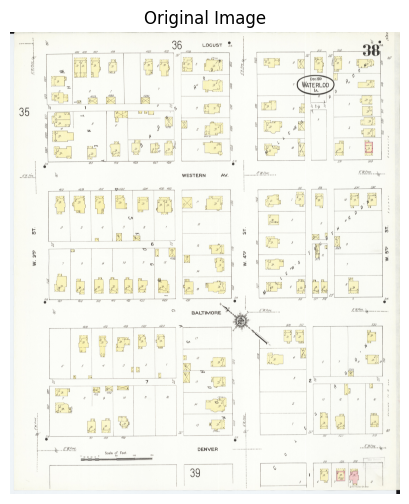

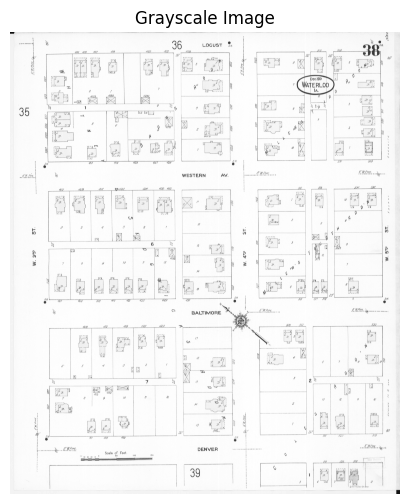

In [ ]:
show_image(image, title='Original Image')
show_image(gray_image, title='Grayscale Image', cmap='gray')

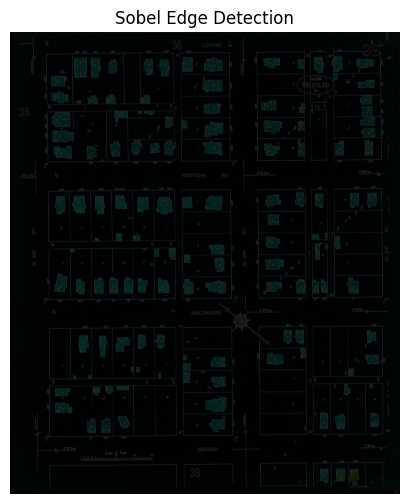

In [ ]:
from skimage import filters, feature

# Sobel Edge Detection
edges_sobel = filters.sobel(image)

# Canny Edge Detection
# edges_canny = feature.canny(color.rgb2gray(image))

show_image(edges_sobel, title='Sobel Edge Detection', cmap='gray')
# show_image(edges_canny, title='Canny Edge Detection', cmap='gray')


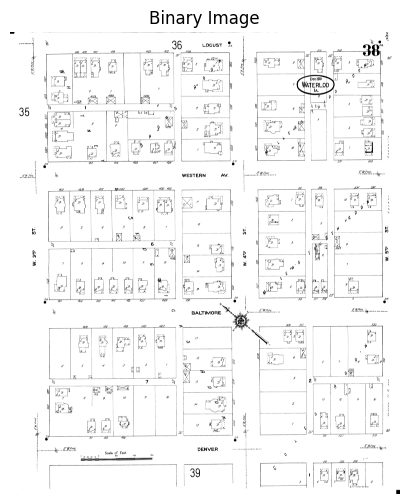

In [ ]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(gray_image)
binary_image = gray_image > thresh

show_image(binary_image, title='Binary Image', cmap='gray')


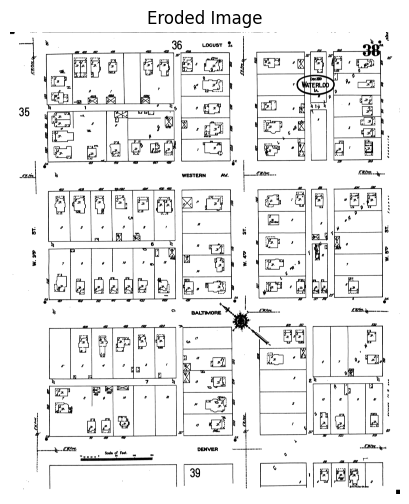

In [ ]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

selem = disk(3)  # Structural element

# Erosion
eroded_image = erosion(binary_image, selem)

show_image(eroded_image, title='Eroded Image', cmap='gray')



In [ ]:
from skimage.feature import corner_harris

# Attempt to detect corners again
try:
    detected_corners = corner_harris(gray_image)
    print("Corner detection successful!")
except Exception as e:
    print("Error in corner detection:", e)

Corner detection successful!


In [ ]:
import numpy as np

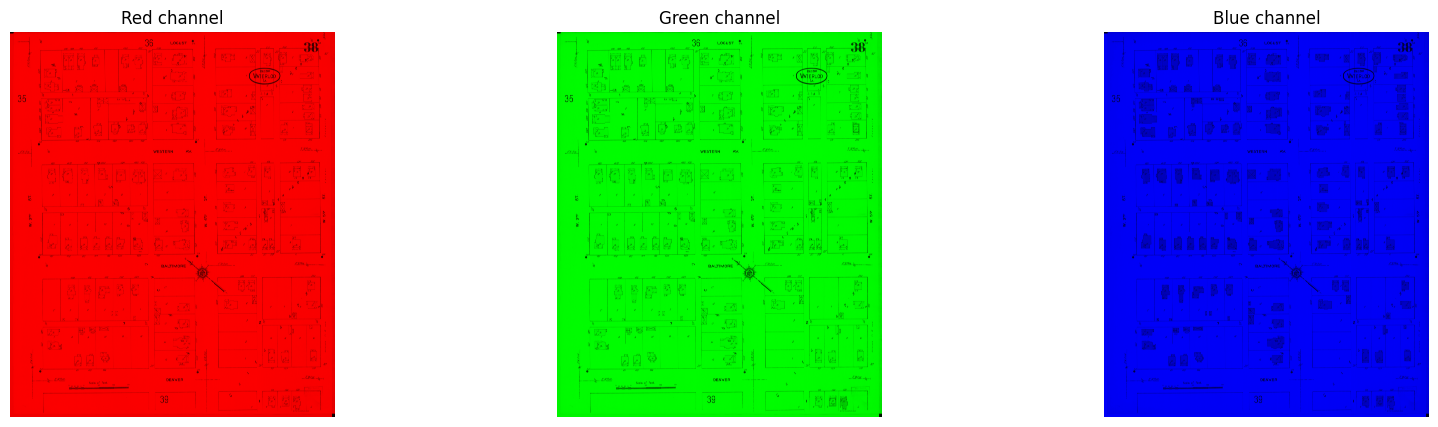

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # Adjusted to 1 row, 3 columns
for i, lab in enumerate(['Red', 'Green', 'Blue']):
    temp = np.zeros(image.shape, dtype='uint8')
    temp[:,:,i] = image[:,:,i]
    ax[i].imshow(temp)
    ax[i].set_title(f'{lab} channel')
    ax[i].axis('off')

plt.show()

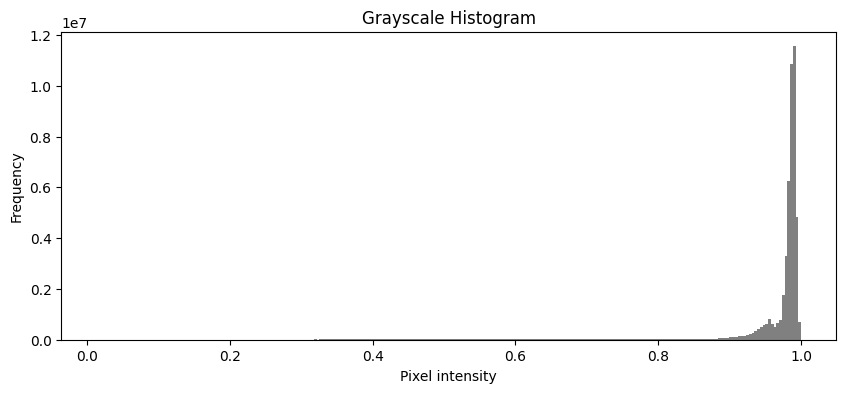

In [ ]:
# Generate histogram for the grayscale image
plt.figure(figsize=(10, 4))
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=1)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()


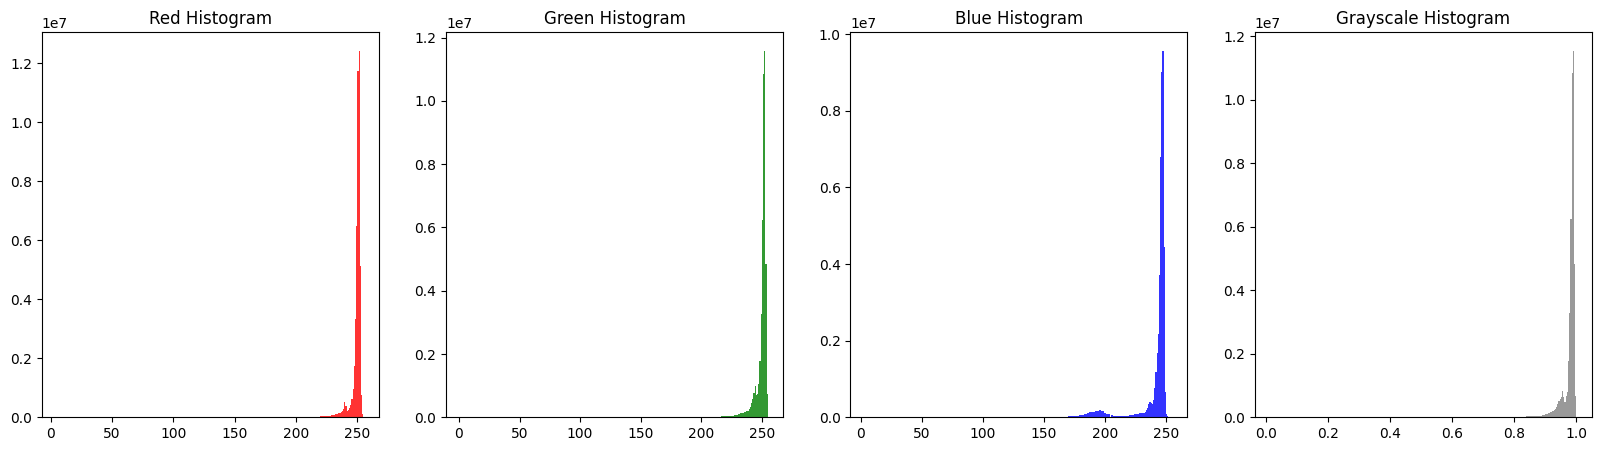

In [ ]:
# Histograms for each channel and grayscale
colors = ('r', 'g', 'b')
channel_labels = ['Red', 'Green', 'Blue']
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# RGB channels
for i, color in enumerate(colors):
    ax[i].hist(image[..., i].ravel(), bins=256, color=color, alpha=0.8)
    ax[i].set_title(f'{channel_labels[i]} Histogram')

# Grayscale
gray_image = rgb2gray(image)
ax[3].hist(gray_image.ravel(), bins=256, color='gray', alpha=0.8)
ax[3].set_title('Grayscale Histogram')
plt.show()


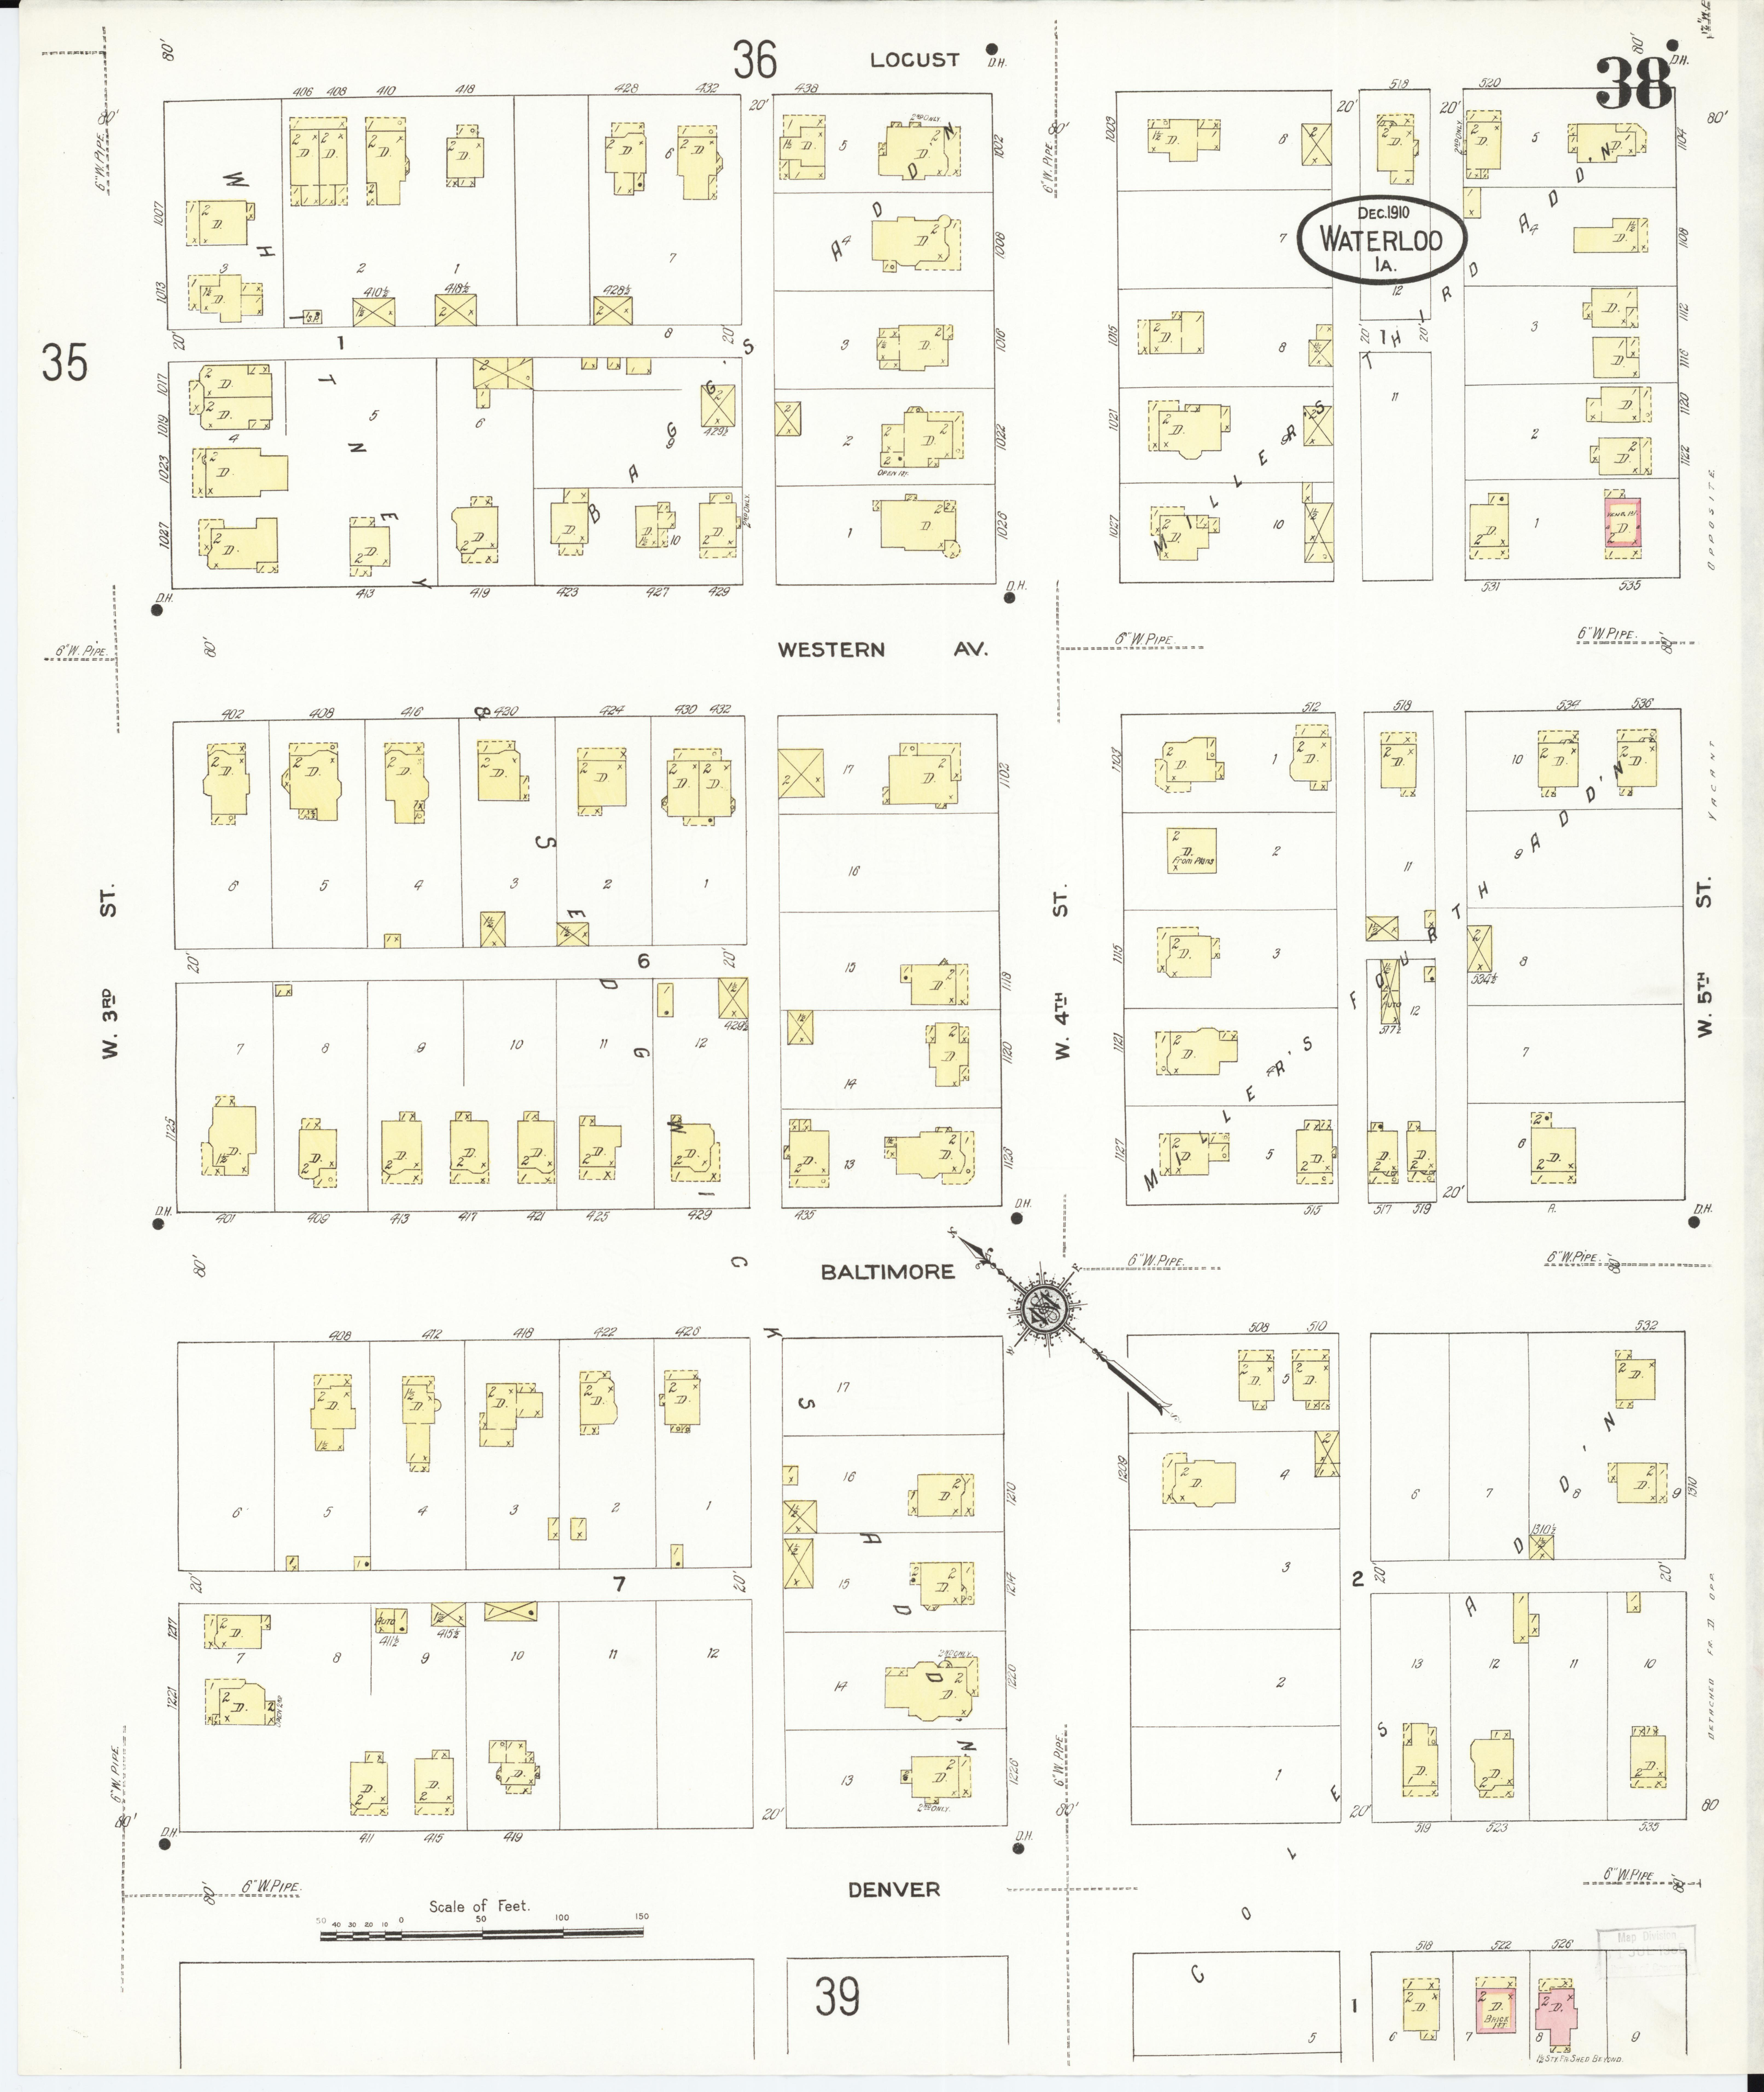

In [ ]:
Image('/Activity_1.jpg', width= 525)

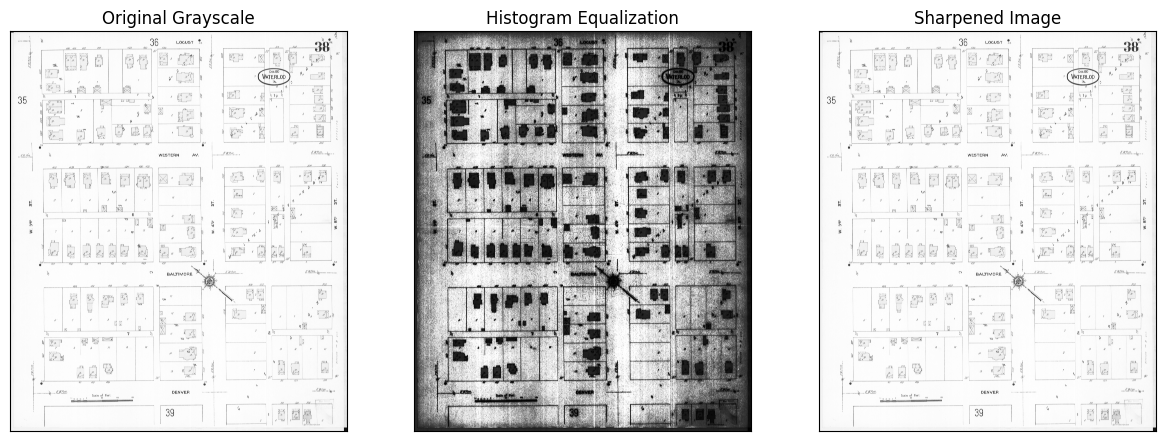

In [ ]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('/Activity_1.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




equalized = cv2.equalizeHist(gray_image)

blurred = cv2.GaussianBlur(gray_image, (3, 3), 0)
sharpened = cv2.addWeighted(gray_image, 1.5, blurred, -0.5, 0)

plt.figure(figsize=(20, 10))
plt.subplot(141), plt.imshow(gray_image, cmap='gray'), plt.title('Original Grayscale')
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(equalized, cmap='gray'), plt.title('Histogram Equalization')
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened Image')
plt.xticks([]), plt.yticks([])
plt.show()


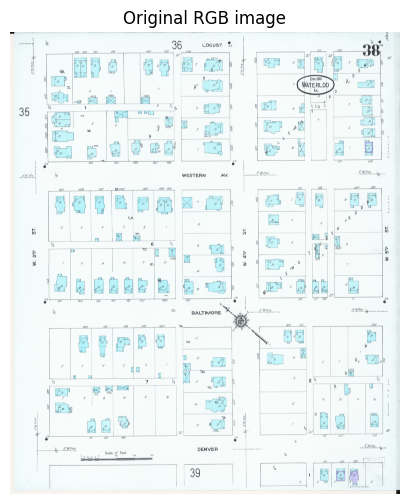

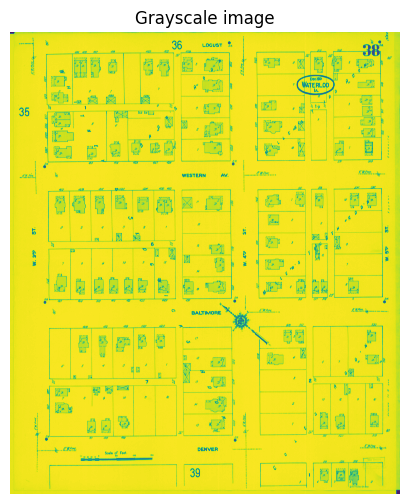

In [ ]:

image = cv2.imread('/Activity_1.jpg')

# Convert the image to grayscale
gray_scaled_image = color.rgb2gray(image)

# Show the original image
show_image(image, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_image, 'Grayscale image')

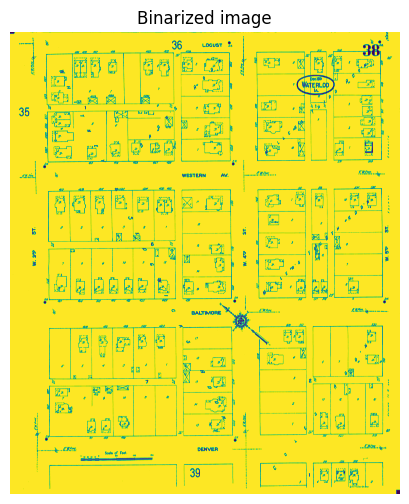

In [ ]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Obtain the optimal thresh
thresh = threshold_otsu(gray_scaled_image)

binary_image = gray_scaled_image > thresh


show_image(binary_image, 'Binarized image')

In [ ]:
from PIL import Image
import numpy as np

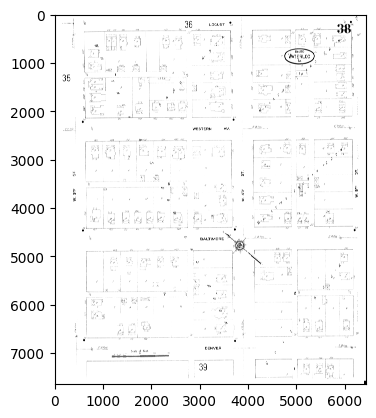

In [91]:
def convert_to_binary(image_path, threshold=128):

    img = Image.open(image_path)
    img = img.convert('L')
    binary_img = img.point(lambda x: 0 if x < threshold else 1)
    binary_array = np.array(binary_img)

    return binary_array

image_path = '/Activity_1.jpg'

binary_data = convert_to_binary(image_path)


# print(binary_data)
plt.imshow(binary_data, cmap='gray')

plt.show()

In [ ]:
binary_data.shape

(7650, 6450)

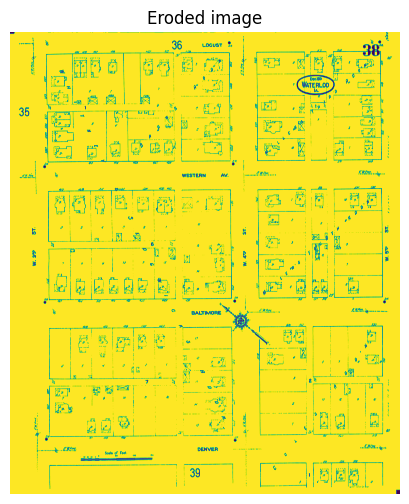

In [96]:
# Import the morphology module
from skimage import morphology

# Obtain the eroded shape
eroded_image_shape = morphology.binary_erosion(binary_data)

# See results
show_image(eroded_image_shape, 'Eroded image')




In [ ]:
from PIL import Image
import numpy as np
from scipy.ndimage import label, find_objects
import pandas as pd

def convert_to_binary(image_path, threshold=128):

    img = Image.open(image_path)

    img = img.convert('L')

    binary_img = img.point(lambda x: 0 if x < threshold else 1)

    binary_array = np.array(binary_img)

    return binary_array

def find_connected_components_and_dimensions(binary_array):

    labeled_array, num_features = label(binary_array)

    slices = find_objects(labeled_array)

    components = []
    for i, slice in enumerate(slices):
        dy, dx = slice
        dimensions = (dx.stop - dx.start, dy.stop - dy.start)
        components.append({'component_id': i + 1, 'dimensions': dimensions, 'bounding_box': slice})

    return components

def main(image_path):

    binary_data = convert_to_binary(image_path)
    components = find_connected_components_and_dimensions(binary_data)

    components_df = pd.DataFrame(components)
    print(components_df)
image_path = 'Activity_1.jpg'

main(image_path)


     component_id    dimensions  \
0               1  (6450, 7650)   
1               2        (1, 1)   
2               3      (33, 22)   
3               4        (1, 1)   
4               5      (33, 38)   
..            ...           ...   
356           357        (2, 3)   
357           358      (23, 25)   
358           359      (11, 12)   
359           360      (17, 18)   
360           361        (1, 1)   

                                          bounding_box  
0         (slice(0, 7650, None), slice(0, 6450, None))  
1       (slice(63, 64, None), slice(6232, 6233, None))  
2       (slice(165, 187, None), slice(594, 627, None))  
3       (slice(193, 194, None), slice(376, 377, None))  
4     (slice(201, 239, None), slice(3247, 3280, None))  
..                                                 ...  
356  (slice(7317, 7320, None), slice(3130, 3132, No...  
357  (slice(7327, 7352, None), slice(5684, 5707, No...  
358  (slice(7434, 7446, None), slice(5629, 5640, No...  
359  (sli